1. Covid-19_Viral_Pneumonia Dataset Images at:
https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset

In [1]:

from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
from pathlib import Path
import numpy as np
import pandas as pd


2. Loading Train and Validation Images Dataset

In [2]:
BATCH_SIZE = 8
PIC_SIZE = 256

train_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255, rotation_range=20,
                                                            width_shift_range = 0.1,
                                                            height_shift_range = 0.1, shear_range= 15,
                                                            zoom_range= [0.5, 1.5])

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

train = train_data.flow_from_directory("./Covid19-dataset/train", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='grayscale')
validation = validation_data.flow_from_directory("./Covid19-dataset/test", target_size=(PIC_SIZE,PIC_SIZE), batch_size=BATCH_SIZE, class_mode="categorical", color_mode='grayscale')

print(train.class_indices)
print(validation.class_indices)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}
{'Covid': 0, 'Normal': 1, 'Viral Pneumonia': 2}


3. Model Structure

In [3]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(PIC_SIZE, PIC_SIZE, 1), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu',  kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal", strides=1,
padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(3, 3), padding="same"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01), kernel_initializer = "he_normal"))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

2024-01-13 00:12:36.558612: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2024-01-13 00:12:36.558634: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-01-13 00:12:36.558643: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-01-13 00:12:36.558674: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-13 00:12:36.558689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


4. Compiling and Training the Model

In [4]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Nadam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=['acc']
)
    
history = model.fit(train,   
    epochs=40, 
    validation_data=validation)

print("Model Trained")

# Save the model
model.save('model_covid_pneumonia.h5')

Epoch 1/40


2024-01-13 00:12:37.644246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 [==============================] - 8s 204ms/step - loss: 20.6741 - acc: 0.4104 - val_loss: 13.8827 - val_acc: 0.6364
Epoch 2/40
32/32 [==============================] - 7s 205ms/step - loss: 12.6443 - acc: 0.5737 - val_loss: 11.5134 - val_acc: 0.6212
Epoch 3/40
32/32 [==============================] - 6s 199ms/step - loss: 10.6065 - acc: 0.6016 - val_loss: 9.7423 - val_acc: 0.6364
Epoch 4/40
32/32 [==============================] - 7s 218ms/step - loss: 9.0768 - acc: 0.6215 - val_loss: 8.4513 - val_acc: 0.7273
Epoch 5/40
32/32 [==============================] - 7s 213ms/step - loss: 7.8671 - acc: 0.6454 - val_loss: 7.3233 - val_acc: 0.6212
Epoch 6/40
32/32 [==============================] - 8s 242ms/step - loss: 6.9376 - acc: 0.5896 - val_loss: 6.5433 - val_acc: 0.5606
Epoch 7/40
32/32 [==============================] - 6s 198ms/step - loss: 6.1540 - acc: 0.6534 - val_loss: 5.7971 - val_acc: 0.6818
Epoch 8/40
32/32 [==============================] - 7s 207ms/step - loss: 5.5358 -

/opt/homebrew/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5. Accuracy and Loss Graphic

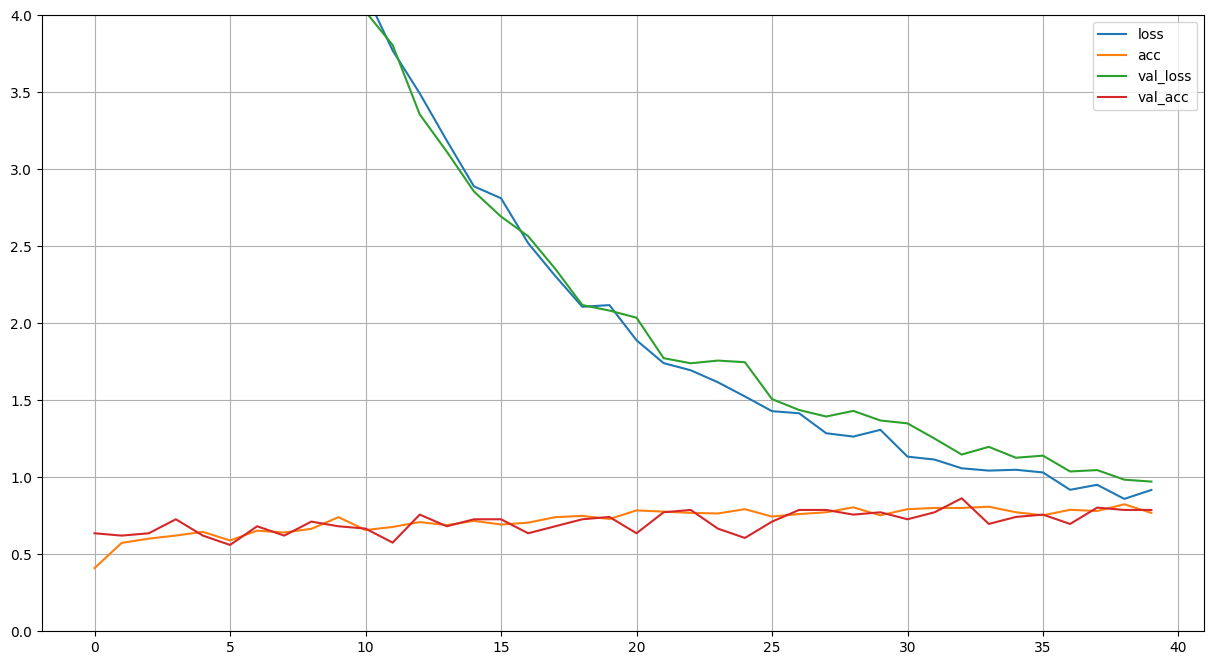

In [5]:
pd.DataFrame(history.history).plot(figsize=(15,8))
plt.grid(True)
plt.gca().set_ylim(0,4)
plt.show()

6. Testing the Model

1/1 [==============================] - 0s 122ms/step
[[0. 0. 1.]]
The Patient has Viral Pneumonia


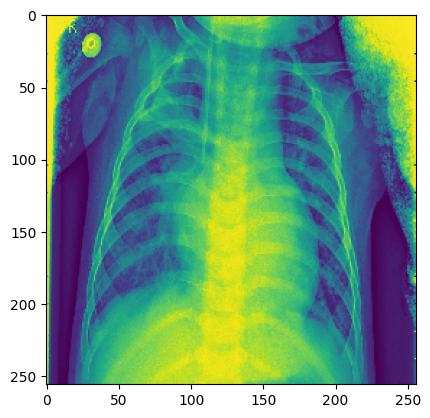

In [6]:
test_img = tf.keras.preprocessing.image.load_img("imgs/0102.JPEG", target_size=(256, 256), color_mode='grayscale')

plt.imshow(test_img)


X = tf.keras.preprocessing.image.img_to_array(test_img)
X = np.expand_dims(X, axis = 0)

prediction = np.vstack([X])

result = model.predict(prediction)

print(result)

arg_max_result = np.argmax(result)

if arg_max_result == 0 :
    print("The Patient has Covid")
elif arg_max_result == 1 :
    print("The Patient has a Normal X-Ray")
elif arg_max_result == 2 :
    print("The Patient has Viral Pneumonia")
